<a href="https://colab.research.google.com/github/sktkddn777/Covid-19/blob/master/%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

타깃이 없을 떄 사용하는 머신러닝 알고리즘(비지도 학습)

In [ ]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy #npy형태로 저장되어있는 300장의 사진 파일 읽음.

--2021-02-03 13:28:03--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-02-03 13:28:03--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-02-03 13:28:03--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... con

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
print(fruits.shape)

(300, 100, 100)


300개 샘플 이미지 크기 100 X 100

In [ ]:
print(fruits[0, 0, :]) #첫번쨰 이미지의 첫번쨰 행

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


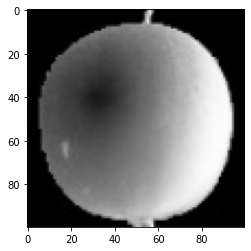

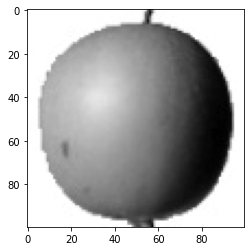

In [ ]:
plt.imshow(fruits[0], cmap='gray')
plt.show()
#-------------------------------------# 바탕이 짗은게(255에 가까움) 컴퓨터가 집중하기 좋음 
plt.imshow(fruits[0], cmap='gray_r') #원본
plt.show()

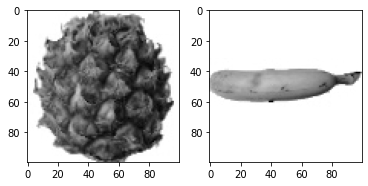

In [ ]:
fig, axs = plt.subplots(1,2) #subplots -> it makes graphs stack like list
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [ ]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
print(apple.shape)

(100, 10000)


평균을 통한 분류

In [ ]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


평균값을 히스토그램을 통해 표현

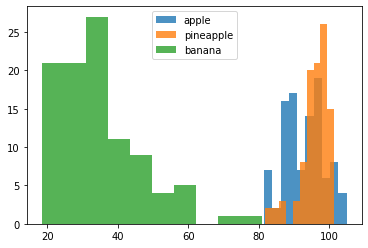

In [ ]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8) #alpha : 투명도
plt.legend(['apple', 'pineapple', 'banana'])

샘플의 평균값으로 하니 겹치는 부분이 있음(사과 , 파인애플)

픽셀의 평균으로 계산

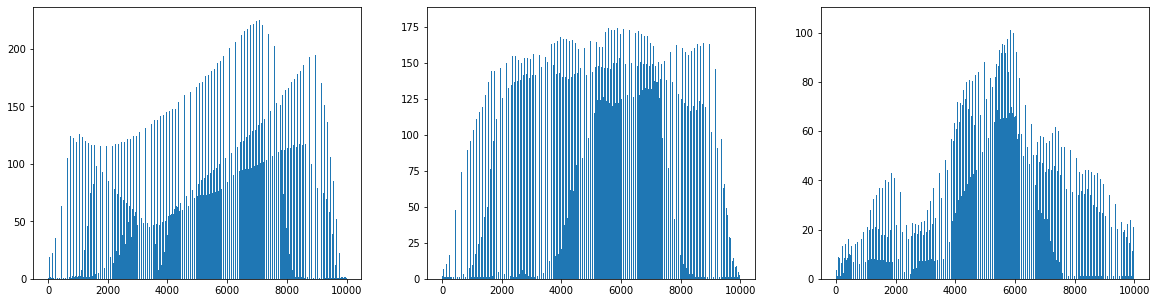

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5)) #figsize : size of figure   //    fig: number of graph
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

모든 사진들의 평균(픽셀값을 이미지로 출력)

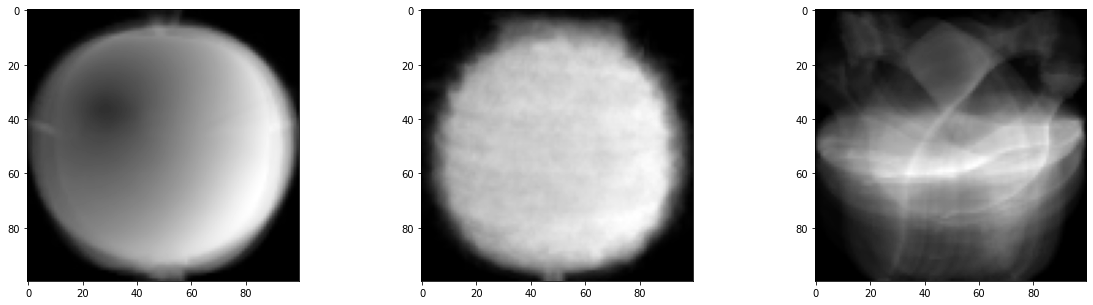

In [ ]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].imshow(apple_mean, cmap='gray')
axs[1].imshow(pineapple_mean, cmap='gray')
axs[2].imshow(banana_mean, cmap='gray')
plt.show()

절댓값 오차를 통해 가까운 사진 고르기

In [ ]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
print(abs_mean.shape)

(300,)


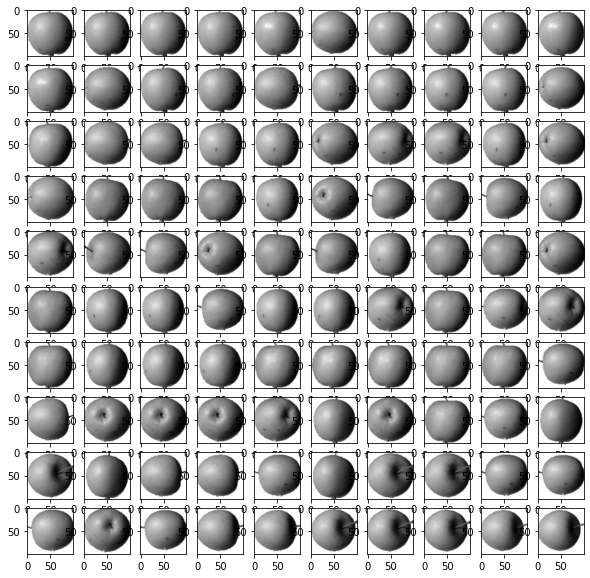

In [ ]:
apple_index = np.argsort(abs_mean)[:100] #argsort -> 오름차순으로 인덱스 반환
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
    #axs[i,j].axis('off')
plt.show()


비슷한 샘플끼리 그룹으로 모으는 작업을 군집이라고 한다.

군집알고리즘을 통해 만든 그룹-> 클러스터


K평균 알고리즘

In [ ]:
from sklearn.cluster import KMeans
fruits_2d = fruits.reshape(-1, 100*100)

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
print(np.unique(km.labels_, return_counts=True)) # 0: 91 , 1: 98, 2:111

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


In [ ]:
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
        #axs[i,j].axis('off')
  plt.show()

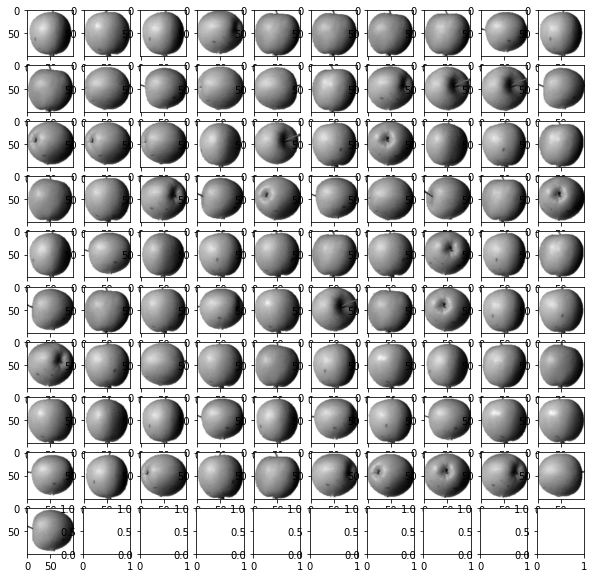

In [ ]:
draw_fruits(fruits[km.labels_==0])

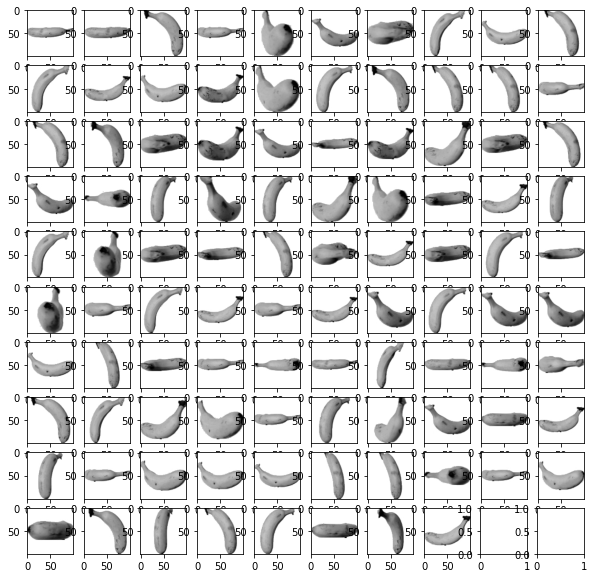

In [ ]:
draw_fruits(fruits[km.labels_==1])

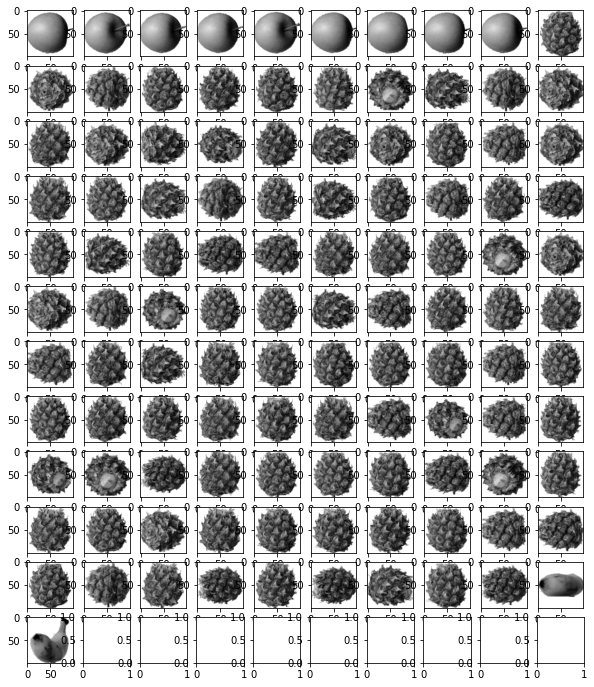

In [ ]:
draw_fruits(fruits[km.labels_==2])

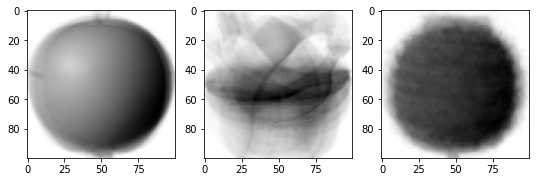

In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3) #cluster_centers_ -> to make image it has to change 2 dimension list

[[5267.70439881 8837.37750892 3393.8136117 ]]
[2]


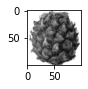

3


In [ ]:
print(km.transform(fruits_2d[100:101])) #fruits_2d[100] -> (10000,)가 되어버림 (1, 10000)가 되야함
print(km.predict(fruits_2d[100:101]))
draw_fruits(fruits[100:101])
print(km.n_iter_) #알고리즘이 반복한 횟수

적절한 n_clusters를 찾기 위한 방법

엘보우 방법(클러스터 중심과 클러스터에 속한 샘플 사이의 거리의 제곱의 합: 이너셔)

클러스터의 개수 증가 -> 이너셔 감소 이를 통해 최적의 클러스터 개수 찾음.

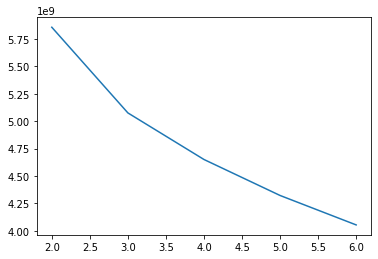

In [ ]:
inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.show()

주성분 분석(PCA)
점이 가장 잘 퍼져있는 부분으로 해서 선을 그어 점들을 모은다.

머신러닝에서의 차원 : 데이터가 가진 속성.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape)#50개의 주성분을 찾음. 원본데이터의 특성 개수와 같은 10000

(50, 10000)


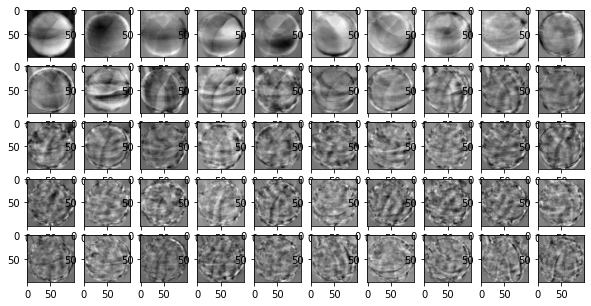

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


(300, 10000)


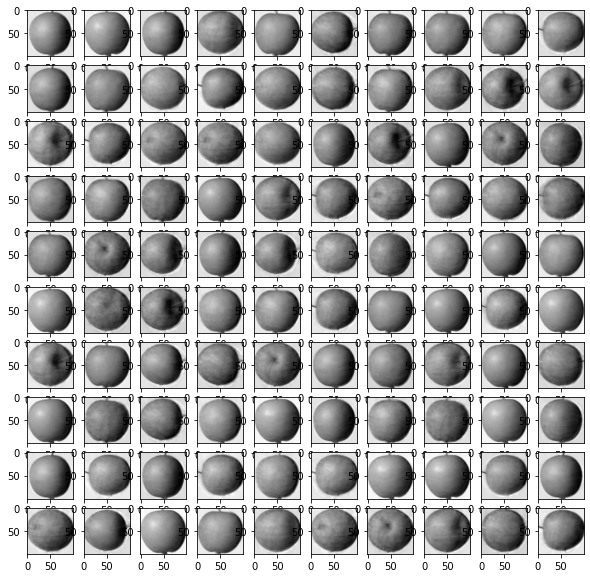

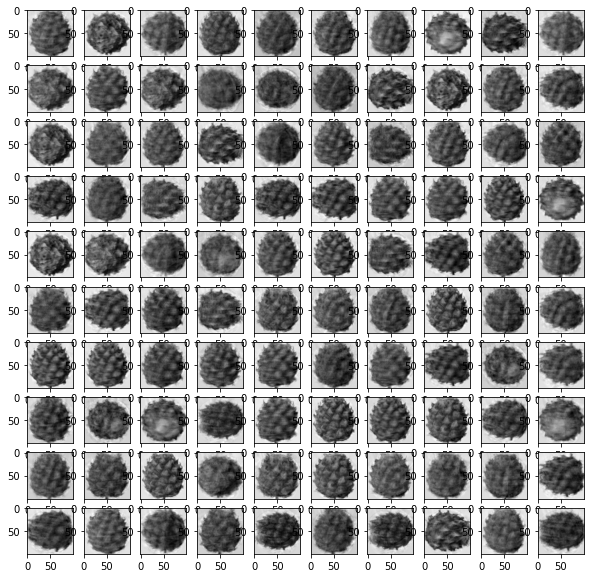

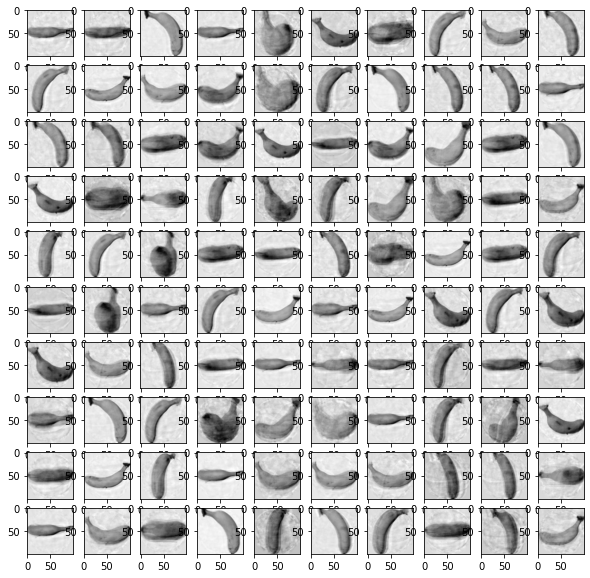

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape) #데이터 복구

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

설명된 분산(주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록)

In [ ]:
print(np.sum(pca.explained_variance_ratio_)) #92%가 넘는 분산을 유지

0.9214725438258319


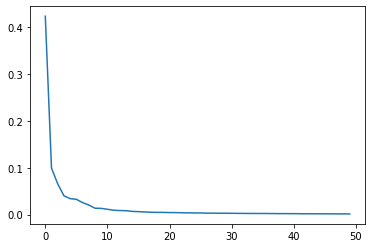

In [ ]:
plt.plot(pca.explained_variance_ratio_)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100) #0: 시과 1:파인애플 2: 바나나


In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) 

0.9966666666666667
1.4816551208496094
1.0
0.04050822257995605


In [ ]:
pca = PCA(n_components=0.5) #분산의 50%에 달ㄹ하는 주성분을 찾도록 모델을 만듦
pca.fit(fruits_2d)
print(pca.n_components_) #2개의 특성만이 분산의 50%를 표현할 수 있음.

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
#반복횟수를 증가하라는 경고

0.9933333333333334
0.04232864379882813


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))
